# Labo III
# Multinacional - Prediccion de Ventas

## Importamos librerias

In [1]:
import pandas as pd
#import pmdarima
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Importaciones necesarias
import pandas as pd
import numpy as np
#from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Optional for larger text and better visuals
sns.set(style="whitegrid", context="talk")

In [5]:
## Importamos datasets

In [2]:
# Load the sales data (tab-delimited)
sales = pd.read_csv("../datasets/sell-in.txt", sep="\t", dtype={"periodo": str})

# Load the stocks data (tab-delimited)
stocks = pd.read_csv("../datasets/tb_stocks.txt", sep="\t", dtype={"periodo": str})

# Load the product information data (tab-delimited)
product_info = pd.read_csv("../datasets/tb_productos.txt", sep="\t")

# Load the product IDs to predict (tab-delimited)
products_to_predict = pd.read_csv('../datasets/product_id_apredecir201912.txt')

In [3]:
sales['periodo'] = pd.to_datetime(sales['periodo'], format='%Y%m')
stocks['periodo'] = pd.to_datetime(stocks['periodo'], format='%Y%m')

In [4]:
# MONTHLY SALES

# Group by month and product, summing total sales in tons
monthly_sales = (
    sales.groupby(['periodo', 'product_id'])['tn']
    .sum()
    .reset_index()
)


In [7]:
# Merge stock_final into full_sales
data = full_sales.merge(stocks, on=['periodo', 'product_id'], how='left')

# Merge product info (static features)
data = data.merge(product_info, on='product_id', how='left')

# BASELINE

In [17]:
#CONSIGNA DE GUSTAVO: SUBIR A KAGGLE LAS PREDICCIONES TOMANDO LA ULTIMA FECHA DE DICIEMBRE 2019


# Cargar los productos a predecir
#products_to_predict = pd.read_csv('../datasets/product_id_apredecir201912.txt')

# Convertir la columna 'periodo' a datetime
#data['periodo'] = pd.to_datetime(data['periodo'])

# Filtrar los datos para diciembre 2019
#data_dic_2019 = data[data['periodo'].dt.year == 2019]
#data_dic_2019 = data_dic_2019[data_dic_2019['periodo'].dt.month == 12]

# Crear el nuevo DataFrame con las columnas product_id y tn
# Solo para los productos en products_to_predict
#nuevo_df = data_dic_2019[data_dic_2019['product_id'].isin(products_to_predict['product_id'])]
#nuevo_df = nuevo_df.groupby('product_id')['tn'].sum().reset_index()

# Asegurar que todos los productos estén incluidos, incluso si no tienen ventas
#todos_productos = pd.merge(products_to_predict[['product_id']], nuevo_df, on='product_id', how='left')
#todos_productos['tn'] = todos_productos['tn'].fillna(0)

# Seleccionar solo las columnas necesarias
#todos_productos = todos_productos[['product_id', 'tn']]

# Guardar el nuevo DataFrame como CSV
#todos_productos.to_csv('resultado_para_kaggle.csv', index=False)

# Mostrar las primeras filas del nuevo DataFrame
#print(todos_productos.head())

# Mostrar información sobre el nuevo DataFrame
#print(todos_productos.info())

# Verificar que tenemos exactamente 780 productos
#print(f"Número total de productos: {len(todos_productos)}")


# AUTOARIMA

In [ ]:
import pandas as pd
import numpy as np

# Cargar el DataFrame original
#data = pd.read_csv('tu_archivo_original.csv')

# Cargar los productos a predecir


# Convertir la columna 'periodo' a datetime
monthly_sales['periodo'] = pd.to_datetime(monthly_sales['periodo'])

# Definir la fecha de corte (diciembre 2019)
fecha_corte = pd.Timestamp('2019-12-01')

# Función para calcular la media de los últimos n meses, excluyendo ceros
def calcular_media_sin_ceros(df, n_meses):
    fecha_inicio = fecha_corte - pd.DateOffset(months=n_meses)
    df_filtrado = df[(df['periodo'] >= fecha_inicio) & (df['periodo'] < fecha_corte)]
    
    # Agrupar por product_id y calcular la media, excluyendo ceros
    return df_filtrado[df_filtrado['tn'] > 0].groupby('product_id')['tn'].mean().reset_index()

# Calcular las medias para 18, 12, 6 y 3 meses
media_18 = calcular_media_sin_ceros(monthly_sales, 18)
media_12 = calcular_media_sin_ceros(monthly_sales, 12)
media_6 = calcular_media_sin_ceros(monthly_sales, 6)
media_3 = calcular_media_sin_ceros(monthly_sales, 3)

# Función para asegurar que todos los productos estén incluidos
def incluir_todos_productos(df):
    todos_productos = pd.merge(products_to_predict[['product_id']], df, on='product_id', how='left')
    todos_productos['tn'] = todos_productos['tn'].fillna(0)
    return todos_productos[['product_id', 'tn']]

# Aplicar la función a cada DataFrame de medias
todos_18 = incluir_todos_productos(media_18)
todos_12 = incluir_todos_productos(media_12)
todos_6 = incluir_todos_productos(media_6)
todos_3 = incluir_todos_productos(media_3)

# Guardar los resultados en CSV
todos_18.to_csv('prediccion_18_meses_sin_ceros.csv', index=False)
todos_12.to_csv('prediccion_12_meses_sin_ceros.csv', index=False)
todos_6.to_csv('prediccion_6_meses_sin_ceros.csv', index=False)
todos_3.to_csv('prediccion_3_meses_sin_ceros.csv', index=False)

# Mostrar información sobre los DataFrames
for df, nombre in zip([todos_18, todos_12, todos_6, todos_3], ['18 meses', '12 meses', '6 meses', '3 meses']):
    print(f"\nPredicción para {nombre}:")
    print(df.head())
    print(f"Número total de productos: {len(df)}")
    print(df.info())
    print(f"Número de productos con predicción > 0: {(df['tn'] > 0).sum()}")


Predicción para 18 meses:
   product_id           tn
0       20001  1522.657901
1       20002  1183.335757
2       20003   833.476484
3       20004   670.712084
4       20005   658.236986
Número total de productos: 780
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  780 non-null    int64  
 1   tn          780 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.3 KB
None
Número de productos con predicción > 0: 780

Predicción para 12 meses:
   product_id           tn
0       20001  1453.232564
1       20002  1168.949311
2       20003   774.753691
3       20004   622.854058
4       20005   649.885925
Número total de productos: 780
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p

In [24]:
import pandas as pd
import numpy as np
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from tqdm import tqdm

# Cargar los productos a predecir
products_to_predict = pd.read_csv('../datasets/product_id_apredecir201912.txt')

# Asumiendo que ya tienes cargado el DataFrame monthly_sales
# Convertir la columna 'periodo' a datetime
monthly_sales['periodo'] = pd.to_datetime(monthly_sales['periodo'])

# Agrupar por 'periodo' y 'product_id', sumando las ventas
monthly_sales = monthly_sales.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()

# Definir la fecha de corte (diciembre 2019)
fecha_corte = pd.Timestamp('2019-12-01')

# Filtrar datos hasta diciembre 2019
data_hasta_dic_2019 = monthly_sales[monthly_sales['periodo'] < pd.Timestamp('2020-01-01')]

# Preparar los datos para StatsForecast
data_for_forecast = data_hasta_dic_2019.rename(columns={'periodo': 'ds', 'product_id': 'unique_id', 'tn': 'y'})

# Crear instancia de StatsForecast
models = [
    AutoARIMA(seasonal=True, stepwise=True)
]
sf = StatsForecast(models=models, freq='MS', n_jobs=-1)

# Ajustar modelos y hacer predicciones
forecasts = sf.forecast(df=data_for_forecast, h=2)

# Extraer predicciones para febrero 2020
predicciones_feb_2020 = forecasts.reset_index()
predicciones_feb_2020 = predicciones_feb_2020[predicciones_feb_2020['ds'] == predicciones_feb_2020['ds'].max()]
predicciones_feb_2020 = predicciones_feb_2020[['unique_id', 'AutoARIMA']]
predicciones_feb_2020.columns = ['product_id', 'tn']

# Asegurar que todos los productos estén incluidos
todos_productos = pd.merge(products_to_predict[['product_id']], predicciones_feb_2020, on='product_id', how='left')
todos_productos['tn'] = todos_productos['tn'].fillna(0)

# Guardar los resultados en CSV
todos_productos.to_csv('prediccion_statsforecast_feb_2020.csv', index=False)

# Mostrar información sobre el DataFrame
print("\nPredicción StatsForecast (AutoARIMA) para febrero 2020:")
print(todos_productos.head())
print(f"Número total de productos: {len(todos_productos)}")
print(todos_productos.info())
print(f"Número de productos con predicción > 0: {(todos_productos['tn'] > 0).sum()}")


Predicción StatsForecast (AutoARIMA) para febrero 2020:
   product_id           tn
0       20001  1488.118128
1       20002  1400.830953
2       20003   896.240069
3       20004   734.259751
4       20005   488.924067
Número total de productos: 780
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  780 non-null    int64  
 1   tn          780 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.3 KB
None
Número de productos con predicción > 0: 775


In [31]:
import pandas as pd
import numpy as np
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from tqdm import tqdm

# 1. Cargar productos a predecir
products_to_predict = pd.read_csv('../datasets/product_id_apredecir201912.txt')

# 2. Preparar datos de ventas mensuales
monthly_sales['periodo'] = pd.to_datetime(monthly_sales['periodo'])
monthly_sales = monthly_sales.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()

# 3. Filtrar datos hasta diciembre 2019
fecha_corte = pd.Timestamp('2019-12-01')
data_hasta_dic_2019 = monthly_sales[monthly_sales['periodo'] <= fecha_corte]

# 4. Preparar datos para StatsForecast
data_for_forecast = data_hasta_dic_2019.rename(columns={'periodo': 'ds', 'product_id': 'unique_id', 'tn': 'y'})

# 5. Instanciar modelo AutoARIMA con parámetros optimizados
models = [
    AutoARIMA(
        seasonal=True,
        stepwise=False,
        season_length=12,
        max_order=12,
        approximation=True,
        allowmean=True,
        method='lbfgs'
    )
]
sf = StatsForecast(models=models, freq='MS', n_jobs=-1)

# 6. Ajustar modelos y predecir 2 meses adelante
forecasts = sf.forecast(df=data_for_forecast, h=2)

# 7. Extraer predicción para febrero 2020 (el segundo mes futuro)
feb_2020 = forecasts.reset_index()
feb_2020 = feb_2020[feb_2020['ds'] == feb_2020['ds'].max()]
feb_2020 = feb_2020[['unique_id', 'AutoARIMA']]
feb_2020.columns = ['product_id', 'tn']

# 8. Asegurar que todos los productos estén incluidos
todos_productos = pd.merge(products_to_predict[['product_id']], feb_2020, on='product_id', how='left')
todos_productos['tn'] = todos_productos['tn'].fillna(0)

# 9. Guardar resultados
todos_productos.to_csv('prediccion_statsforecast_feb_2020.csv', index=False)

# 10. Mostrar resumen
print("\nPredicción StatsForecast (AutoARIMA) para febrero 2020:")
print(todos_productos.head())
print(f"Número total de productos: {len(todos_productos)}")
print(todos_productos.info())
print(f"Número de productos con predicción > 0: {(todos_productos['tn'] > 0).sum()}")


Predicción StatsForecast (AutoARIMA) para febrero 2020:
   product_id          tn
0       20001  1504.68856
1       20002  1087.30855
2       20003   647.28098
3       20004   441.70332
4       20005   630.50965
Número total de productos: 780
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  780 non-null    int64  
 1   tn          780 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 12.3 KB
None
Número de productos con predicción > 0: 767


# Dealing with zeros

In [7]:
# MONTHLY SALES

# Group by month and product, summing total sales in tons
monthly_sales = (
    sales.groupby(['periodo', 'product_id', 'customer_id'])['tn']
    .sum()
    .reset_index()
)


In [8]:
# Ordenar el DataFrame por periodo, product_id y customer_id
monthly_sales = monthly_sales.sort_values(['periodo', 'product_id', 'customer_id'])

# Crear un DataFrame con todas las combinaciones posibles de periodo, product_id y customer_id
all_periods = monthly_sales['periodo'].drop_duplicates()
all_products = monthly_sales['product_id'].drop_duplicates()
all_customers = monthly_sales['customer_id'].drop_duplicates()

full_index = pd.MultiIndex.from_product(
    [all_periods, all_products, all_customers],
    names=['periodo', 'product_id', 'customer_id']
)

# Crear un DataFrame completo con todas las combinaciones
full_sales = pd.DataFrame(index=full_index).reset_index()

# Fusionar con las ventas originales
full_sales = full_sales.merge(monthly_sales, on=['periodo', 'product_id', 'customer_id'], how='left')

# Encontrar la primera y última compra para cada combinación de producto y cliente
first_last_purchase = monthly_sales.groupby(['product_id', 'customer_id']).agg({
    'periodo': ['min', 'max']
}).reset_index()
first_last_purchase.columns = ['product_id', 'customer_id', 'first_purchase', 'last_purchase']

# Fusionar esta información con full_sales
full_sales = full_sales.merge(first_last_purchase, on=['product_id', 'customer_id'], how='left')

# Aplicar la lógica de llenado
def fill_logic(row):
    if pd.isnull(row['tn']):
        if row['periodo'] >= row['first_purchase'] and row['periodo'] <= row['last_purchase']:
            return 0
    return row['tn']

full_sales['tn'] = full_sales.apply(fill_logic, axis=1)

# Eliminar filas donde no hay ventas y están fuera del rango de compra
full_sales = full_sales[
    (~full_sales['tn'].isnull()) | 
    ((full_sales['periodo'] >= full_sales['first_purchase']) & 
     (full_sales['periodo'] <= full_sales['last_purchase']))
]

# Limpiar columnas temporales y ordenar el resultado
full_sales = full_sales.drop(['first_purchase', 'last_purchase'], axis=1)
full_sales = full_sales.sort_values(['periodo', 'product_id', 'customer_id'])

# Rellenar los NaN restantes con 0
full_sales['tn'] = full_sales['tn'].fillna(0)

In [9]:
# Merge stock_final into full_sales
data = full_sales.merge(stocks, on=['periodo', 'product_id'], how='left')

# Merge product info (static features)
data = data.merge(product_info, on='product_id', how='left')

In [ ]:
data

,periodo,product_id,customer_id,tn
0,2017-01-01,20001,10001,99.43861
1,2017-01-01,20001,10002,35.72806
2,2017-01-01,20001,10003,143.49426
3,2017-01-01,20001,10004,184.72927
4,2017-01-01,20001,10005,19.08407
...,...,...,...,...
26278849,2019-12-01,21271,10159,0.00075
26402695,2019-12-01,21276,10029,0.00075
26402652,2019-12-01,21276,10052,0.00594
26402698,2019-12-01,21276,10219,0.00075


C:\Users\s1093678\AppData\Local\Temp\ipykernel_36124\3554025368.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['periodo'] = pd.to_datetime(filtered_df['periodo'])


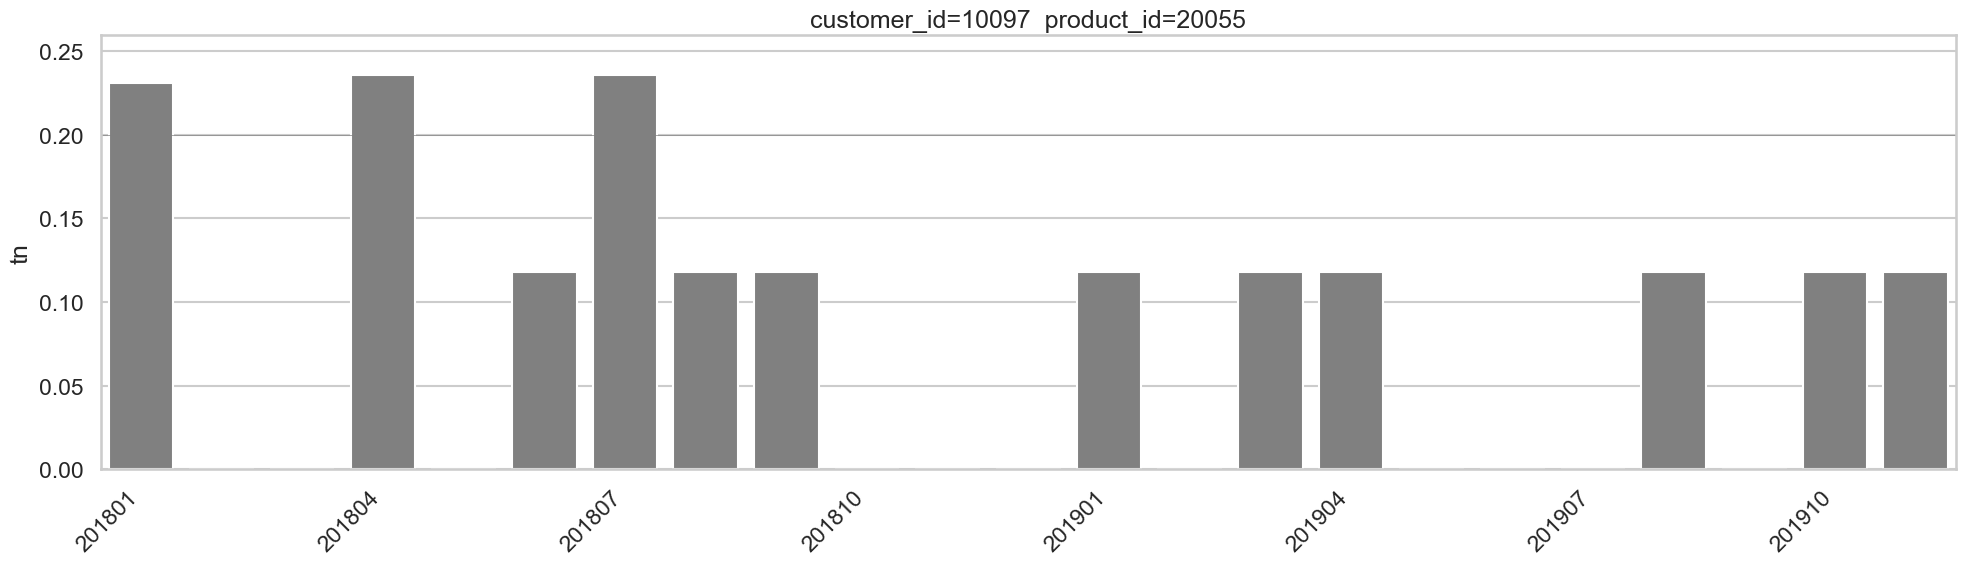

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

customer_id = 10097
product_id = 20055

filtered_df = data[(data['customer_id'] == customer_id) & (data['product_id'] == product_id)]

# Convert 'periodo' to datetime if it's not already
filtered_df['periodo'] = pd.to_datetime(filtered_df['periodo'])

# Sort the DataFrame by date
filtered_df = filtered_df.sort_values('periodo')

# Create the plot
plt.figure(figsize=(20, 6))  # Increased figure width
sns.set_style("whitegrid")
ax = sns.barplot(x=filtered_df.index, y='tn', data=filtered_df, color='gray')

# Customize the plot
plt.title(f'customer_id={customer_id}  product_id={product_id}')
plt.xlabel('')
plt.ylabel('tn')

# Remove default x-axis labels
plt.xticks([])

# Add x-axis ticks and labels more frequently
x_ticks = range(0, len(filtered_df), 3)  # Increased frequency (every 3 months)
x_labels = [filtered_df['periodo'].iloc[i].strftime('%Y%m') for i in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=45, ha='right')

# Set y-axis limits
plt.ylim(0, filtered_df['tn'].max() * 1.1)

# Add horizontal lines
for y in np.arange(0.2, plt.ylim()[1], 0.2):
    plt.axhline(y=y, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout to prevent cutting off x-axis labels
plt.tight_layout()

# Show the plot
plt.show()

# FE

In [89]:
# Ordenar el DataFrame por producto_id y periodo
data = data.sort_values(['product_id', 'periodo'])

# Calcular la media móvil de 6 meses
data['moving_avg_6m'] = data.groupby('product_id')['tn'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())

# Desplazar la media móvil un mes hacia atrás para evitar data leakage
data['moving_avg_6m'] = data.groupby('product_id')['moving_avg_6m'].shift(1)

# Llenar los valores NaN con la media del producto
data['moving_avg_6m'] = data.groupby('product_id')['moving_avg_6m'].transform(lambda x: x.fillna(x.mean()))

# Calcular la media móvil de 6 meses
data['moving_avg_12m'] = data.groupby('product_id')['tn'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Desplazar la media móvil un mes hacia atrás para evitar data leakage
data['moving_avg_12m'] = data.groupby('product_id')['moving_avg_12m'].shift(1)

# Llenar los valores NaN con la media del producto
data['moving_avg_12m'] = data.groupby('product_id')['moving_avg_12m'].transform(lambda x: x.fillna(x.mean()))


# Calcular la media móvil de 6 meses
data['moving_avg_6m'] = data.groupby('product_id')['tn'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())

# Desplazar la media móvil un mes hacia atrás para evitar data leakage
data['moving_avg_6m'] = data.groupby('product_id')['moving_avg_6m'].shift(1)

# Llenar los valores NaN con la media del producto
data['moving_avg_6m'] = data.groupby('product_id')['moving_avg_6m'].transform(lambda x: x.fillna(x.mean()))

# Calcular la media móvil de 12 meses
data['moving_avg_12m'] = data.groupby('product_id')['tn'].transform(lambda x: x.rolling(window=12, min_periods=1).mean())

# Desplazar la media móvil un mes hacia atrás para evitar data leakage
data['moving_avg_12m'] = data.groupby('product_id')['moving_avg_12m'].shift(1)

# Llenar los valores NaN con la media del producto
data['moving_avg_12m'] = data.groupby('product_id')['moving_avg_12m'].transform(lambda x: x.fillna(x.mean()))

# Calcular el desvío móvil de 6 meses
data['moving_std_6m'] = data.groupby('product_id')['tn'].transform(lambda x: x.rolling(window=6, min_periods=1).std())

# Desplazar el desvío móvil un mes hacia atrás para evitar data leakage
data['moving_std_6m'] = data.groupby('product_id')['moving_std_6m'].shift(1)

# Llenar los valores NaN con el desvío estándar del producto
data['moving_std_6m'] = data.groupby('product_id')['moving_std_6m'].transform(lambda x: x.fillna(x.std()))

# Calcular el desvío móvil de 12 meses
data['moving_std_12m'] = data.groupby('product_id')['tn'].transform(lambda x: x.rolling(window=12, min_periods=1).std())

# Desplazar el desvío móvil un mes hacia atrás para evitar data leakage
data['moving_std_12m'] = data.groupby('product_id')['moving_std_12m'].shift(1)

# Llenar los valores NaN con el desvío estándar del producto
data['moving_std_12m'] = data.groupby('product_id')['moving_std_12m'].transform(lambda x: x.fillna(x.std()))

# LIGHTGBM

Calcular o simular una prediccion para el 201912 con los datos del 201910 para generar una curva de pred vs real para ver como performa mi modelo

Forma de X_train: (28634, 14)
Forma de X_val: (955, 14)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3287
[LightGBM] [Info] Number of data points in the train set: 28634, number of used features: 953
[LightGBM] [Info] Start training from score 45.176667


C:\Users\s1093678\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Forma de predictions: (955, 2)
Primeras filas de predictions:
   product_id           tn
0       20001  1221.201051
1       20002  1012.338596
2       20003   759.223555
3       20004   678.215168
4       20005   638.129599
Error (Suma de errores absolutos / Suma de valores reales): 0.3452
Error Absoluto Medio: 10.235712269823443
Muestra de comparación:
   product_id  tn_predicted     tn_real
0       20001   1221.201051  1504.68856
1       20002   1012.338596  1087.30855
2       20003    759.223555   892.50129
3       20004    678.215168   637.90002
4       20005    638.129599   593.24443


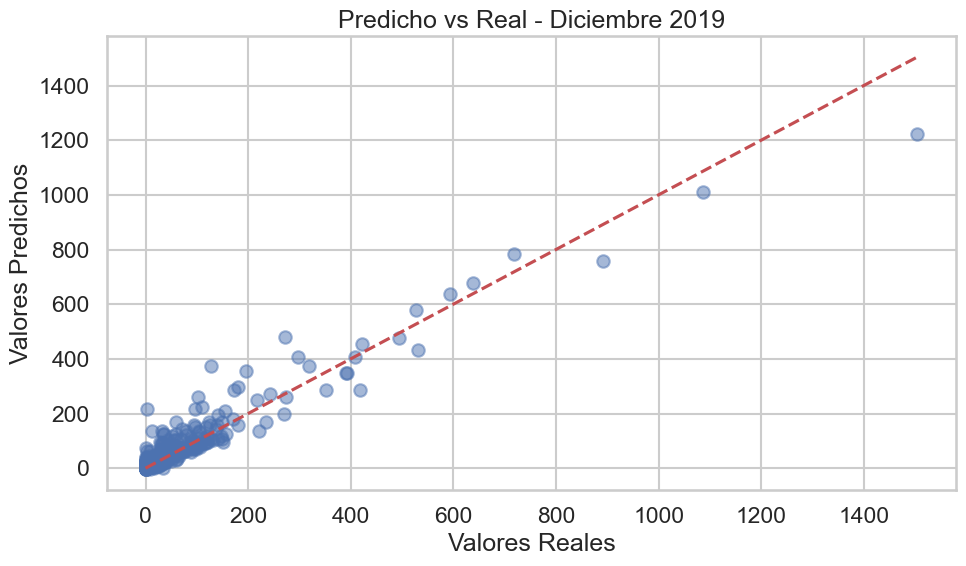

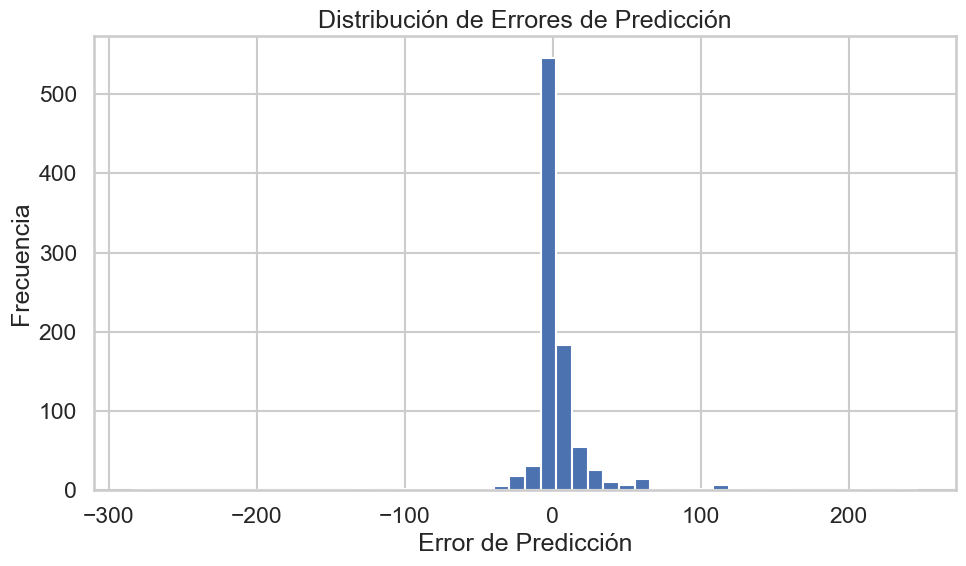

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
import lightgbm as lgb
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Asumiendo que 'data' ya está cargado
data['periodo'] = pd.to_datetime(data['periodo'])

# Filtrar los datos hasta octubre de 2019
data_train = data[data['periodo'] <= '2019-10-31'].copy()

# Definir la fecha objetivo para la predicción
target_date = pd.to_datetime('2019-12-01')

# Crear características adicionales
data_train['year'] = data_train['periodo'].dt.year
data_train['month'] = data_train['periodo'].dt.month
data_train['months_since_start'] = (data_train['periodo'] - data_train['periodo'].min()).dt.days // 30

# Definir las características a utilizar
numeric_features = ['months_since_start', 'year', 'month', 'customer_id', 'sku_size','moving_avg_6m','moving_avg_12m','moving_std_12m','moving_std_6m']
categorical_features = ['product_id', 'cat1', 'cat2', 'cat3', 'brand']
features = numeric_features + categorical_features

# Preparar los conjuntos de entrenamiento y validación
X = data_train[features + ['periodo']]
y = data_train['tn']

# Usar los datos hasta septiembre de 2019 para entrenamiento y octubre de 2019 para validación
train_mask = X['periodo'] < '2019-10-01'
X_train, X_val = X[train_mask], X[~train_mask]
y_train, y_val = y[train_mask], y[~train_mask]

# Eliminar 'periodo' de las características de entrenamiento
X_train = X_train.drop('periodo', axis=1)
X_val = X_val.drop('periodo', axis=1)

print("Forma de X_train:", X_train.shape)
print("Forma de X_val:", X_val.shape)

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=10000, learning_rate=0.05, num_leaves=31, random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Función para hacer predicciones
def make_predictions(model, data, target_date, products_to_predict, features):
    last_dates = data.groupby('product_id')['periodo'].max().reset_index()
    
    pred_data = []
    for product_id in products_to_predict:
        last_date = last_dates[last_dates['product_id'] == product_id]['periodo'].iloc[0]
        product_data = data[(data['product_id'] == product_id) & (data['periodo'] == last_date)].copy()
        if not product_data.empty:
            product_data['periodo'] = target_date
            product_data['months_since_start'] += (target_date - last_date).days // 30
            product_data['year'] = target_date.year
            product_data['month'] = target_date.month
            pred_data.append(product_data)
    
    pred_data = pd.concat(pred_data, ignore_index=True)
    
    if pred_data.empty:
        print("No hay datos disponibles para la predicción")
        return pd.DataFrame(columns=['product_id', 'tn'])
    
    X_pred = pred_data[features]
    predictions = model.predict(X_pred)
    
    results = pd.DataFrame({
        'product_id': pred_data['product_id'],
        'tn': predictions
    })
    return results

# Obtener la lista de productos a predecir (todos los productos en 201910)
products_to_predict = data_train[data_train['periodo'] == '2019-10-01']['product_id'].unique()

# Hacer predicciones
predictions = make_predictions(model, data_train, target_date, products_to_predict, features)

print("Forma de predictions:", predictions.shape)
print("Primeras filas de predictions:")
print(predictions.head())

# Obtener datos reales de diciembre 2019
real_data_201912 = data[data['periodo'] == '2019-12-01'][['product_id', 'tn']]
real_data_201912 = real_data_201912.rename(columns={'tn': 'tn_real'})

# Combinar predicciones con datos reales
comparison_df = pd.merge(predictions, real_data_201912, on='product_id', how='inner')
comparison_df = comparison_df.rename(columns={'tn': 'tn_predicted'})

# Calcular el error absoluto medio
mae = (comparison_df['tn_predicted'] - comparison_df['tn_real']).abs().mean()

# Calcular el error como la suma de los errores absolutos dividido por la suma de los valores reales
error = (comparison_df['tn_predicted'] - comparison_df['tn_real']).abs().sum() / comparison_df['tn_real'].sum()

print(f"Error (Suma de errores absolutos / Suma de valores reales): {error:.4f}")
print("Error Absoluto Medio:", mae)
print("Muestra de comparación:")
print(comparison_df.head())

# Graficar predicho vs real
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['tn_real'], comparison_df['tn_predicted'], alpha=0.5)
plt.plot([0, comparison_df['tn_real'].max()], [0, comparison_df['tn_real'].max()], 'r--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicho vs Real - Diciembre 2019')
plt.tight_layout()
plt.show()

# Graficar histograma de errores
errors = comparison_df['tn_predicted'] - comparison_df['tn_real']
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores de Predicción')
plt.tight_layout()
plt.show()

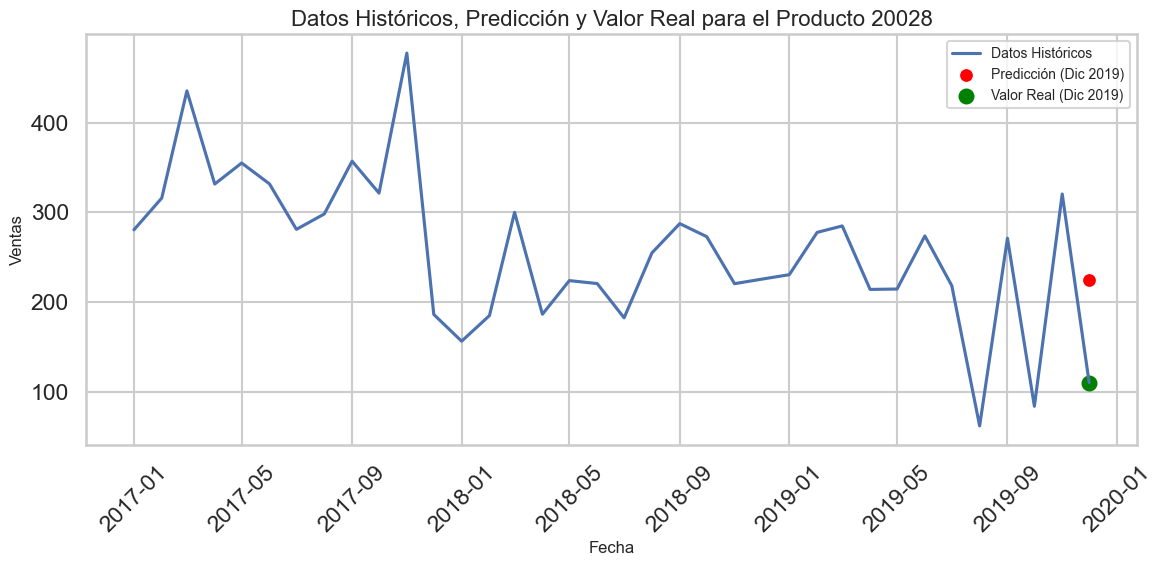

In [102]:
# Elegir un producto específico para visualizar
product_id = 20028    # Puedes cambiar este ID por el de cualquier producto que te interese

# Filtrar datos para el producto seleccionado
product_data = data[data['product_id'] == product_id].copy()
product_forecast = comparison_df[comparison_df['product_id'] == product_id].iloc[0]

# Ordenar datos por fecha
product_data = product_data.sort_values('periodo')

# Crear DataFrame para la predicción
forecast_data = pd.DataFrame({
    'periodo': [target_date],
    'tn': [product_forecast['tn_predicted']]
})

# Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Graficar datos históricos
sns.lineplot(x='periodo', y='tn', data=product_data, label='Datos Históricos')

# Graficar predicción
sns.scatterplot(x='periodo', y='tn', data=forecast_data, label='Predicción (Dic 2019)', color='red', s=100)

# Graficar valor real de diciembre 2019
real_value = product_data[product_data['periodo'] == target_date]['tn'].values[0]
plt.scatter(target_date, real_value, color='green', s=100, label='Valor Real (Dic 2019)')

# Personalizar el gráfico
plt.title(f'Datos Históricos, Predicción y Valor Real para el Producto {product_id}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.legend(fontsize=10)

# Rotar etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()